In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp


In [57]:

# Read the CSV file
df = pd.read_csv(r'C:\Users\karan\OneDrive\Desktop\Desktop\Institite_Sem_Wise\Sem 6\DAV\DAV_Project\data\Daily_data_of_reservoir_level_of_Central_Water_Commission_(CWC)_Agency_during_March_2024.csv')


In [58]:
for reservoir_name in df['Reservoir_name'].unique():
    # Filter data for the current reservoir
    reservoir_data = df[df['Reservoir_name'] == reservoir_name]
    
    # Compute mean values for 'Storage' and 'Level' columns
    storage_mean = reservoir_data['Storage'].mean()
    level_mean = reservoir_data['Level'].mean()
    
    # Replace NaN values with mean values for the current reservoir
    df.loc[df['Reservoir_name'] == reservoir_name, 'Storage'] = df.loc[df['Reservoir_name'] == reservoir_name, 'Storage'].fillna(storage_mean)
    df.loc[df['Reservoir_name'] == reservoir_name, 'Level'] = df.loc[df['Reservoir_name'] == reservoir_name, 'Level'].fillna(level_mean)

# Save the updated data to a new CSV file
# df.to_csv('updated_data.csv', index=False)

# print("NaN values replaced with mean values and data saved to 'updated_data.csv'")

In [59]:
# Read the updated CSV file
# final_df = pd.read_csv('updated_data.csv')
# final_df.head(31)
df.to_csv('updated_data.csv', index=False)

print("NaN values replaced with mean values and data saved to 'updated_data.csv'")
final_df = pd.read_csv('updated_data.csv')
final_df.head(88)

NaN values replaced with mean values and data saved to 'updated_data.csv'


,Reservoir_name,Basin,Subbasin,Agency_name,Lat,Long,Date,Year,Month,Full_reservoir_level,Live_capacity_FRL,Storage,Level
0,Aliyar Reservoir,West flowing rivers from Tadri to Kanyakumari ...,Varrar and others,CWC,10.472668,76.974597,2024-03-01,2024,3,320.04,0.095,0.008100,303.505000
1,Aliyar Reservoir,West flowing rivers from Tadri to Kanyakumari ...,Varrar and others,CWC,10.472668,76.974597,2024-03-02,2024,3,320.04,0.095,0.007550,303.352000
2,Aliyar Reservoir,West flowing rivers from Tadri to Kanyakumari ...,Varrar and others,CWC,10.472668,76.974597,2024-03-03,2024,3,320.04,0.095,0.005422,302.071517
3,Aliyar Reservoir,West flowing rivers from Tadri to Kanyakumari ...,Varrar and others,CWC,10.472668,76.974597,2024-03-04,2024,3,320.04,0.095,0.006690,303.093000
4,Aliyar Reservoir,West flowing rivers from Tadri to Kanyakumari ...,Varrar and others,CWC,10.472668,76.974597,2024-03-05,2024,3,320.04,0.095,0.006210,302.941000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Balimela Reservoir,Godavari Basin,Godavari Lower,CWC,18.224944,82.204236,2024-03-22,2024,3,462.08,2.676,1.073500,451.118250
84,Balimela Reservoir,Godavari Basin,Godavari Lower,CWC,18.224944,82.204236,2024-03-23,2024,3,462.08,2.676,1.073500,451.118250
85,Balimela Reservoir,Godavari Basin,Godavari Lower,CWC,18.224944,82.204236,2024-03-24,2024,3,462.08,2.676,1.073500,451.118250
86,Balimela Reservoir,Godavari Basin,Godavari Lower,CWC,18.224944,82.204236,2024-03-25,2024,3,462.08,2.676,1.073500,451.118250


In [60]:
aliyar_data = df[df['Reservoir_name'] == 'Aliyar Reservoir']
almatti_data = df[df['Reservoir_name'] == 'Almatti Reservoir']
balimela_data = df[df['Reservoir_name'] == 'Balimela Reservoir']
# Plot daily variation for Aliyar Reservoir


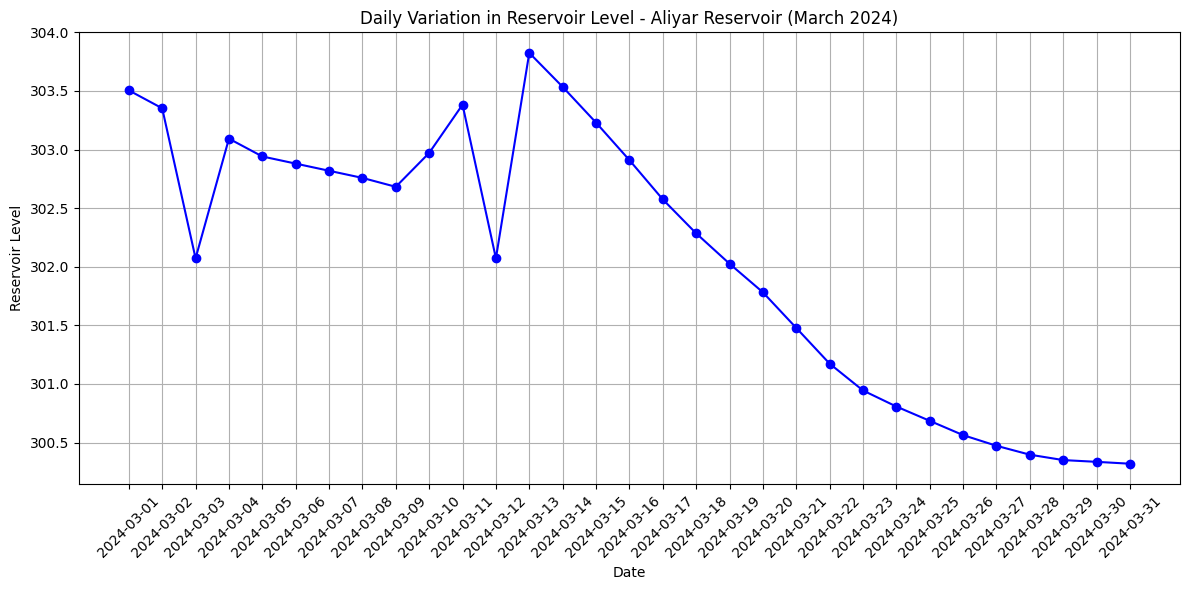

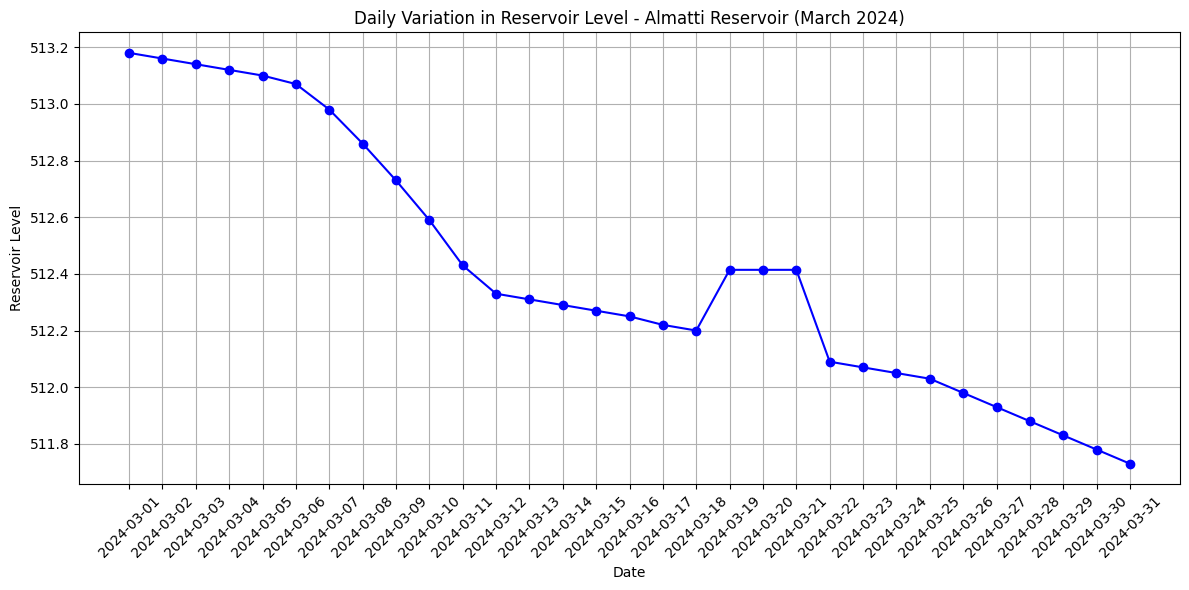

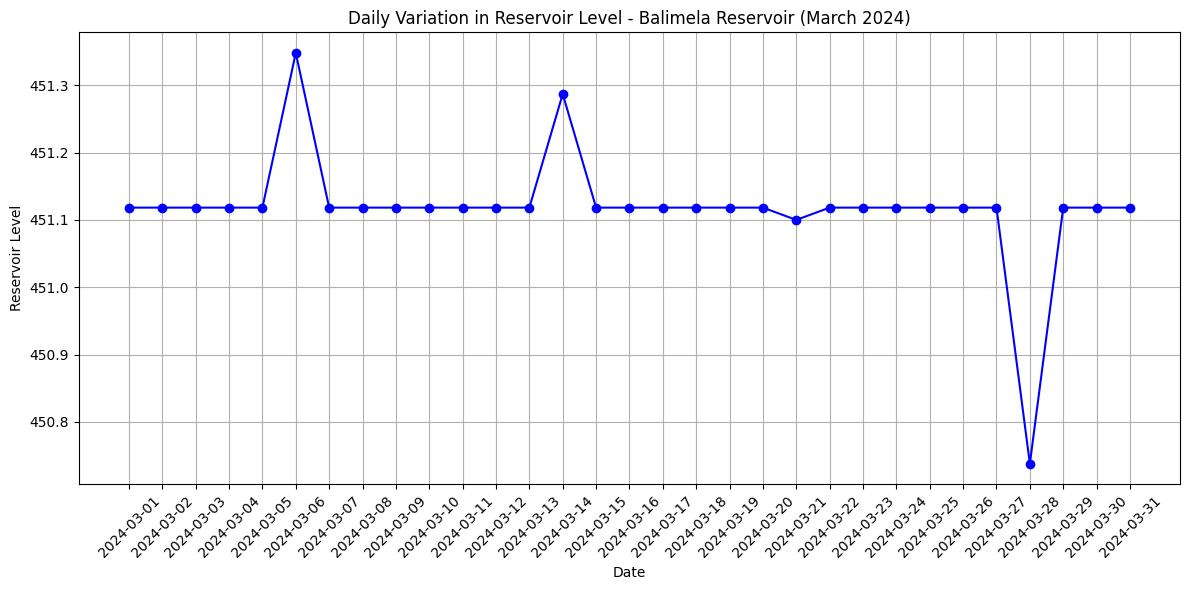

In [61]:
# Task1 - Plotting Daily Variation of top 3 reservoirs in March 2024 

# Plot daily variation for Aliyar Reservoir
plt.figure(figsize=(12, 6))
plt.plot(aliyar_data['Date'], aliyar_data['Level'], marker='o', linestyle='-', color='b')
plt.title('Daily Variation in Reservoir Level - Aliyar Reservoir (March 2024)')
plt.xlabel('Date')
plt.ylabel('Reservoir Level')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Plot daily variation for Almatti Reservoir
plt.figure(figsize=(12, 6))
plt.plot(almatti_data['Date'], almatti_data['Level'], marker='o', linestyle='-', color='b')
plt.title('Daily Variation in Reservoir Level - Almatti Reservoir (March 2024)')
plt.xlabel('Date')
plt.ylabel('Reservoir Level')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot daily variation for Balimela Reservoir
plt.figure(figsize=(12, 6))
plt.plot(balimela_data['Date'], balimela_data['Level'], marker='o', linestyle='-', color='b')
plt.title('Daily Variation in Reservoir Level - Balimela Reservoir (March 2024)')
plt.xlabel('Date')
plt.ylabel('Reservoir Level')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
# Task - Finding the highest and lowest level of each reservoir in March 2024

grouped_data = df.groupby('Reservoir_name')

# Iterate over each reservoir group
for reservoir_name, group in grouped_data:
    # Find the row with the highest level
    max_level_row = group.loc[group['Level'].idxmax()]
    # Find the row with the lowest level
    min_level_row = group.loc[group['Level'].idxmin()]
    
    # Print the results
    print(f"Reservoir: {reservoir_name}")
    print(f"Highest Level: {max_level_row['Level']} on {max_level_row['Date']}")
    print(f"Lowest Level: {min_level_row['Level']} on {min_level_row['Date']}")
    print()

Reservoir: Aliyar Reservoir
Highest Level: 303.825 on 2024-03-13
Lowest Level: 300.319 on 2024-03-31

Reservoir: Almatti Reservoir
Highest Level: 513.18 on 2024-03-01
Lowest Level: 511.73 on 2024-03-31

Reservoir: Balimela Reservoir
Highest Level: 451.348 on 2024-03-06
Lowest Level: 450.738 on 2024-03-28

Reservoir: Ban Sagar
Highest Level: 337.22 on 2024-03-07
Lowest Level: 336.1 on 2024-03-28

Reservoir: Bargi\Rani Avanti Bai Sagar
Highest Level: 417.8 on 2024-03-01
Lowest Level: 416.797 on 2024-03-28

Reservoir: Barna
Highest Level: 344.85 on 2024-03-01
Lowest Level: 343.94 on 2024-03-28

Reservoir: Bhadar Reservoir
Highest Level: 103.14 on 2024-03-01
Lowest Level: 102.5 on 2024-03-31

Reservoir: Bhadra Reservoir
Highest Level: 642.954 on 2024-03-02
Lowest Level: 640.979 on 2024-03-31

Reservoir: Bhandardara
Highest Level: 733.14 on 2024-03-01
Lowest Level: 732.37 on 2024-03-31

Reservoir: Bhatghar
Highest Level: 611.52 on 2024-03-07
Lowest Level: 607.36 on 2024-03-28

Reservoir: Bh

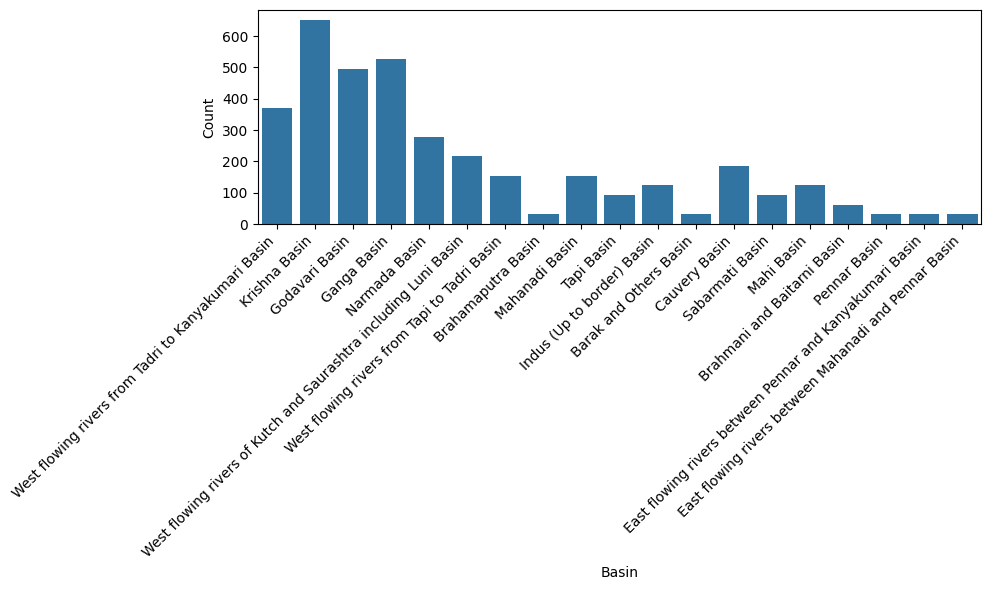

In [71]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Basin')
plt.xlabel('Basin')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

a = df.copy()
columns_to_drop = ['Basin', 'Subbasin', 'Agency_name', 'Lat', 'Long', 'Date', 'Year', 'Month', 'Full_reservoir_level', 'Live_capacity_FRL']
a.drop(columns_to_drop, axis=1, inplace=True)
b = a.groupby(['Reservoir_name']).agg({'Storage': 'mean', 'Level': 'mean'}).reset_index()
b.rename(columns={'Storage': 'average_Storage', 'Level': 'average_Level'}, inplace=True)
b.to_csv("reservoir_avg_level.csv", index=False)

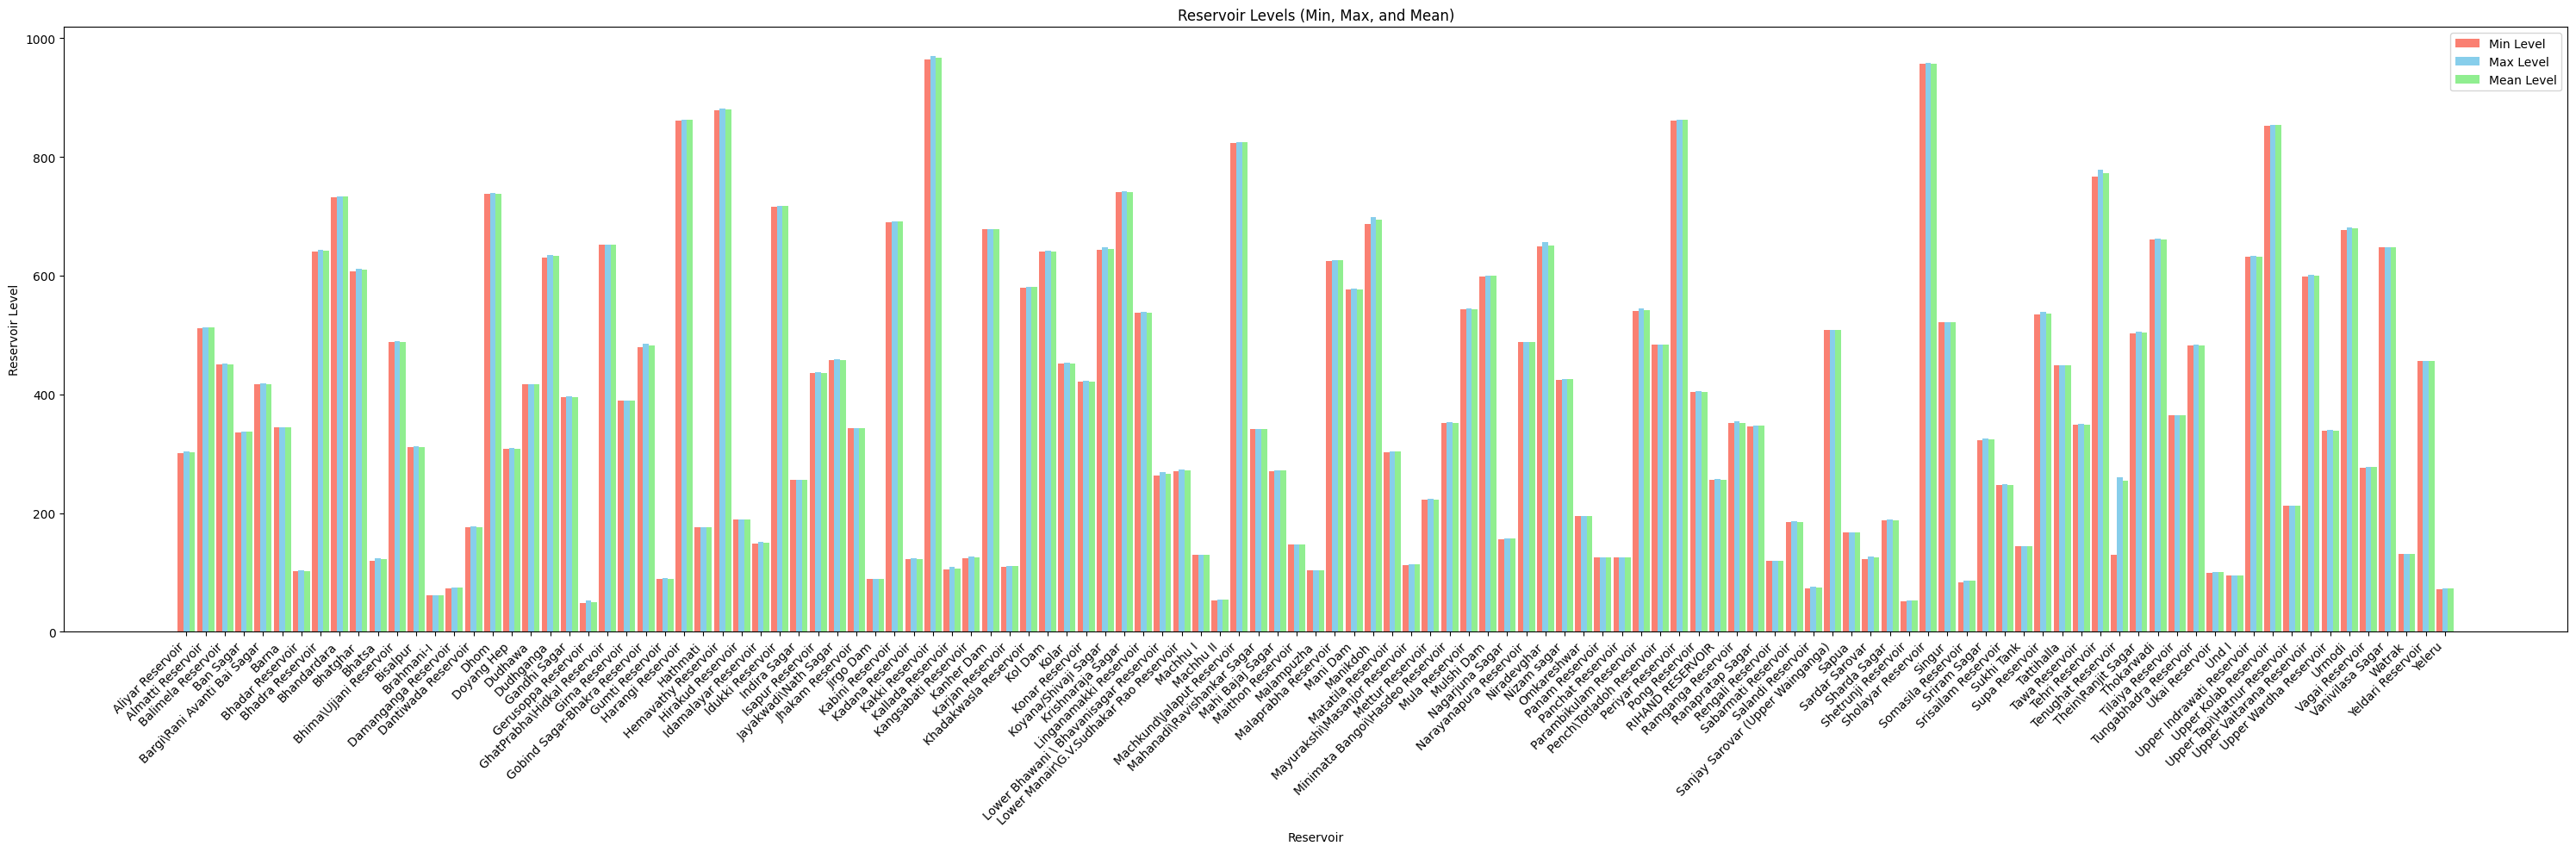

In [13]:

# Group the data by reservoir name
grouped_data = df.groupby('Reservoir_name')

# Initialize lists to store reservoir names, max levels, min levels, and mean levels
reservoirs = []
max_levels = []
min_levels = []
mean_levels = []

# Find highest, lowest, and mean levels for each reservoir
for reservoir, data in grouped_data:
    max_levels.append(data['Level'].max())
    min_levels.append(data['Level'].min())
    mean_levels.append(data['Level'].mean())
    reservoirs.append(reservoir)

# Plot the bar plot for min, max, and mean levels for each reservoir
plt.figure(figsize=(30, 10))

# Plot bars for minimum levels
plt.bar([x - 0.3 for x in range(len(reservoirs))], min_levels, color='salmon', width=0.3, label='Min Level')

# Plot bars for maximum levels
plt.bar(range(len(reservoirs)), max_levels, color='skyblue', width=0.3, label='Max Level')

# Plot bars for mean levels
plt.bar([x + 0.3 for x in range(len(reservoirs))], mean_levels, color='lightgreen', width=0.3, label='Mean Level')

plt.title('Reservoir Levels (Min, Max, and Mean)')
plt.xlabel('Reservoir')
plt.ylabel('Reservoir Level')
plt.xticks(range(len(reservoirs)), reservoirs, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\karan\AppData\Local\Temp\ipykernel_26928\2906770623.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reservoirs, y=mean_levels, palette='viridis')


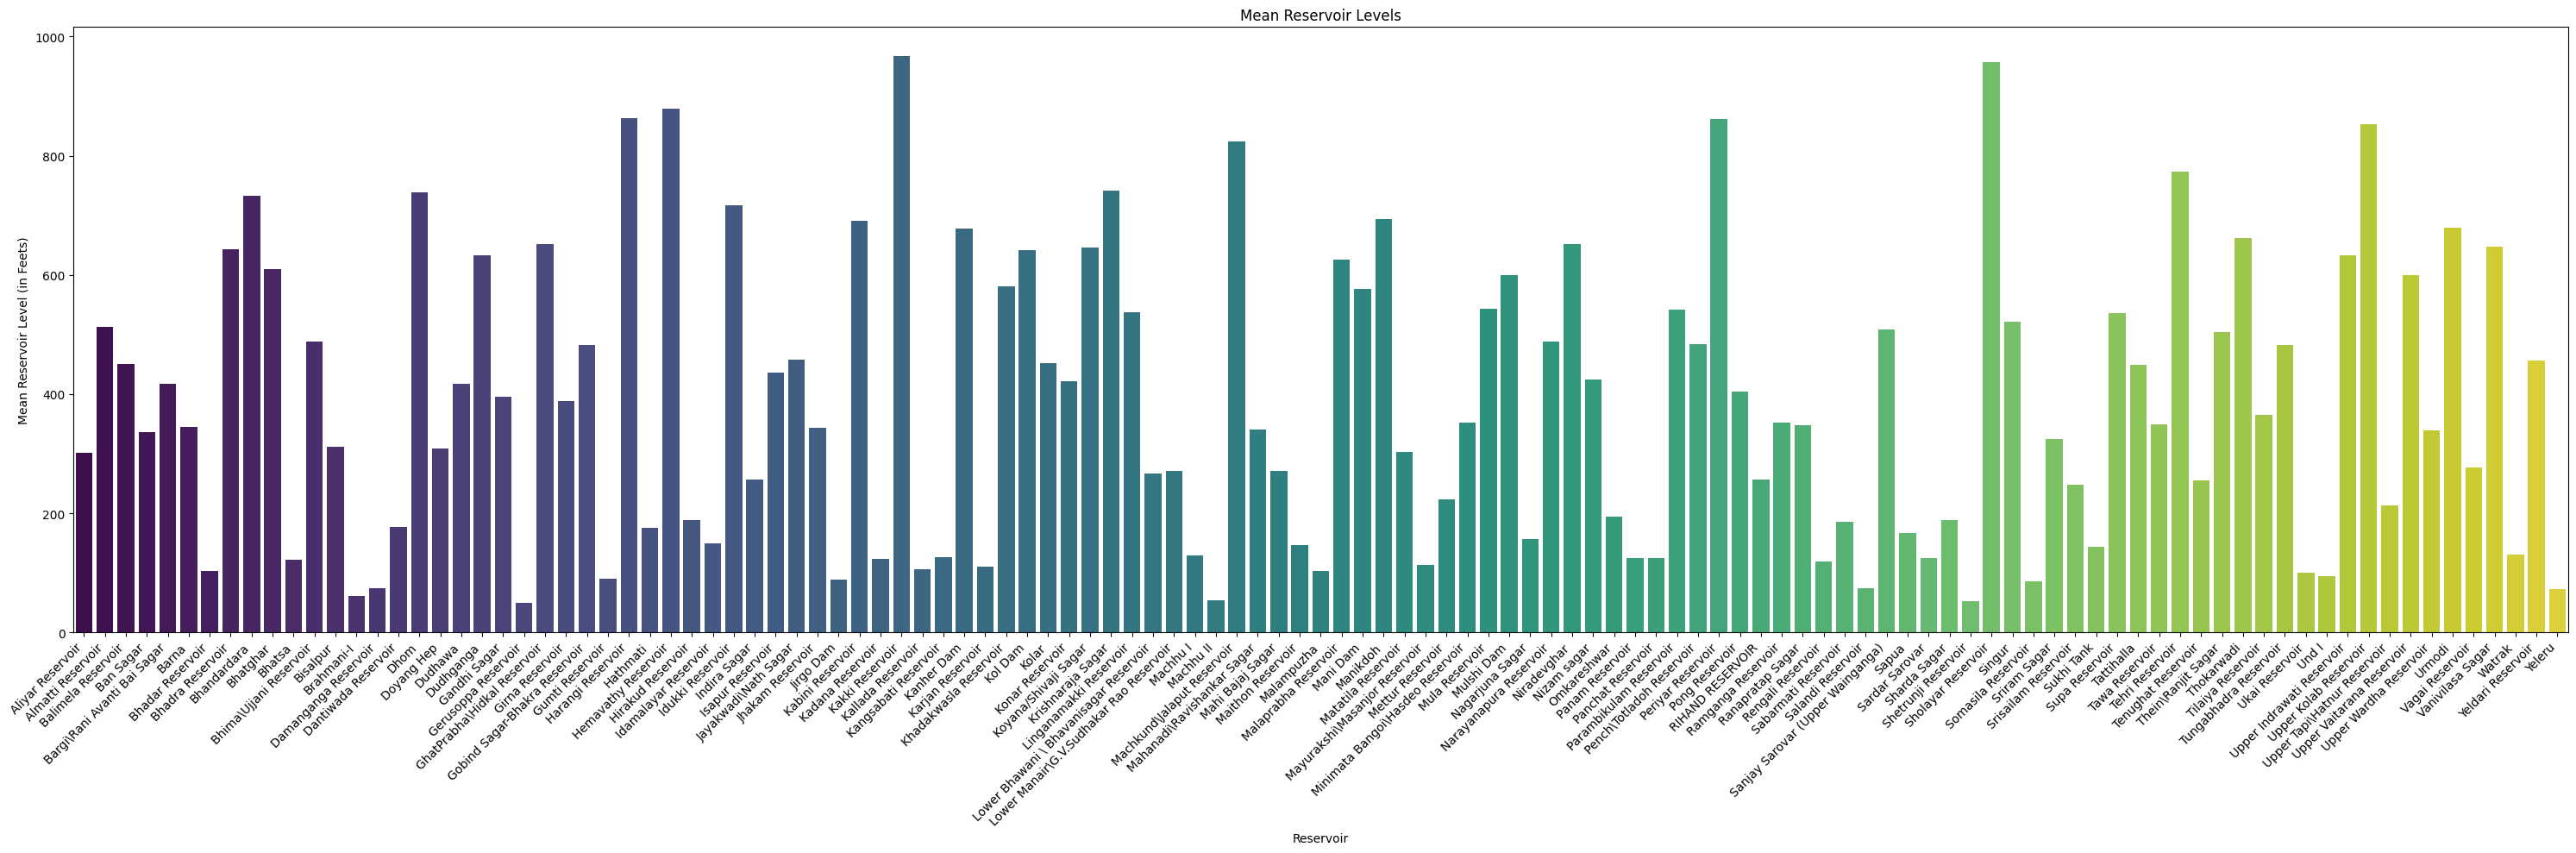

In [14]:
reservoirs = []
mean_levels = []
for reservoir, data in grouped_data:
    mean_levels.append(data['Level'].mean())
    reservoirs.append(reservoir)

# Plot the bar plot for mean levels for each reservoir using Seaborn
plt.figure(figsize=(30, 10))
sns.barplot(x=reservoirs, y=mean_levels, palette='viridis')
plt.title('Mean Reservoir Levels')
plt.xlabel('Reservoir')
plt.ylabel('Mean Reservoir Level (in Feets)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\karan\AppData\Local\Temp\ipykernel_24184\4090525106.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reservoirs, y=mean_storage, palette='viridis')


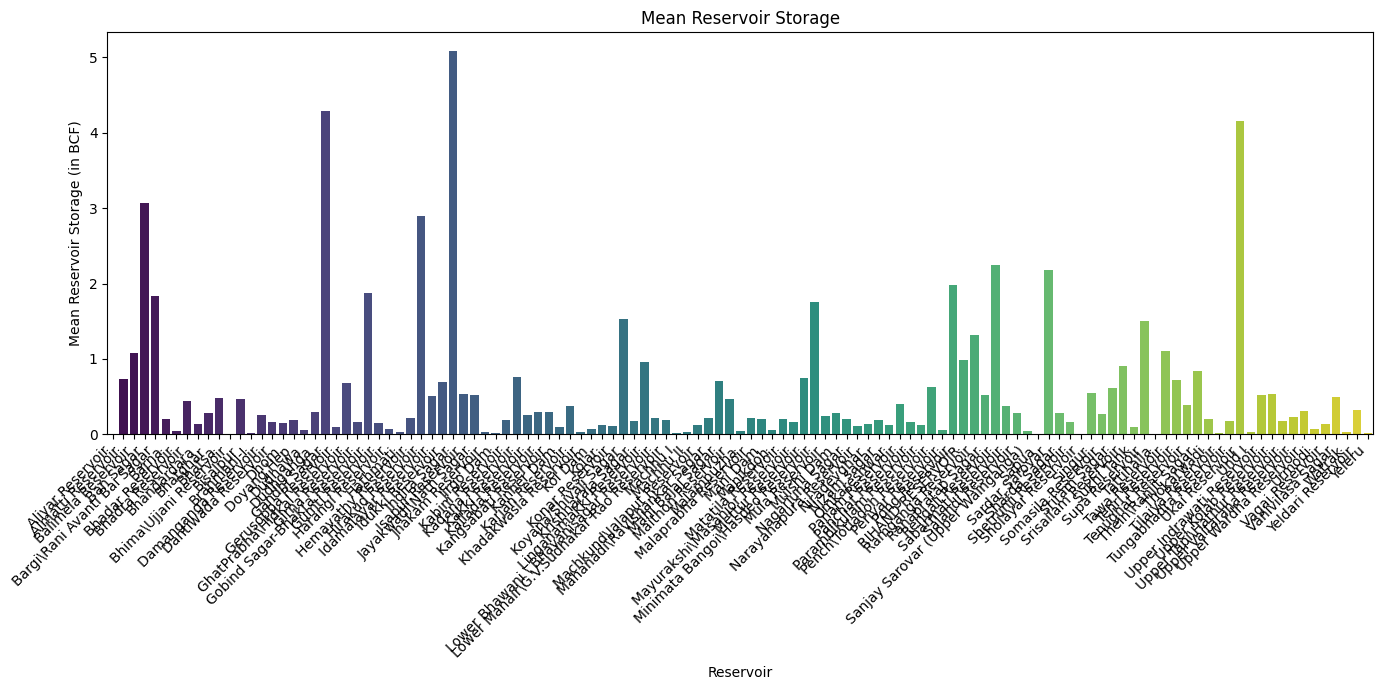

In [40]:
reservoirs = []
mean_storage = []
for reservoir, data in grouped_data:
    mean_storage.append(data['Storage'].mean())
    reservoirs.append(reservoir)

# Plot the bar plot for mean storage values for each reservoir using Seaborn
plt.figure(figsize=(14, 7))
sns.barplot(x=reservoirs, y=mean_storage, palette='viridis')
plt.title('Mean Reservoir Storage')
plt.xlabel('Reservoirs')
plt.ylabel('Mean Reservoir Storage (in BCF)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


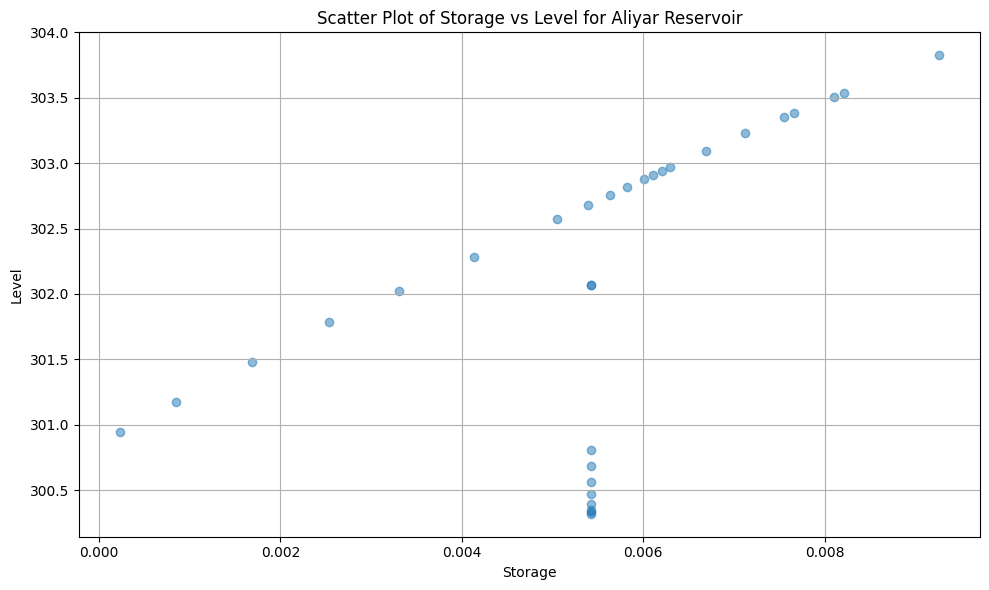

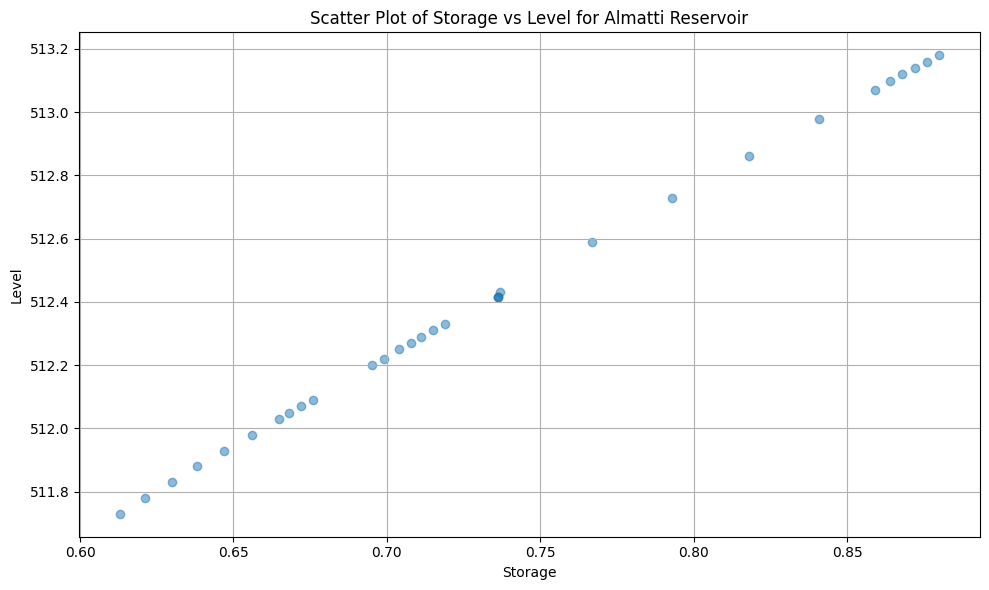

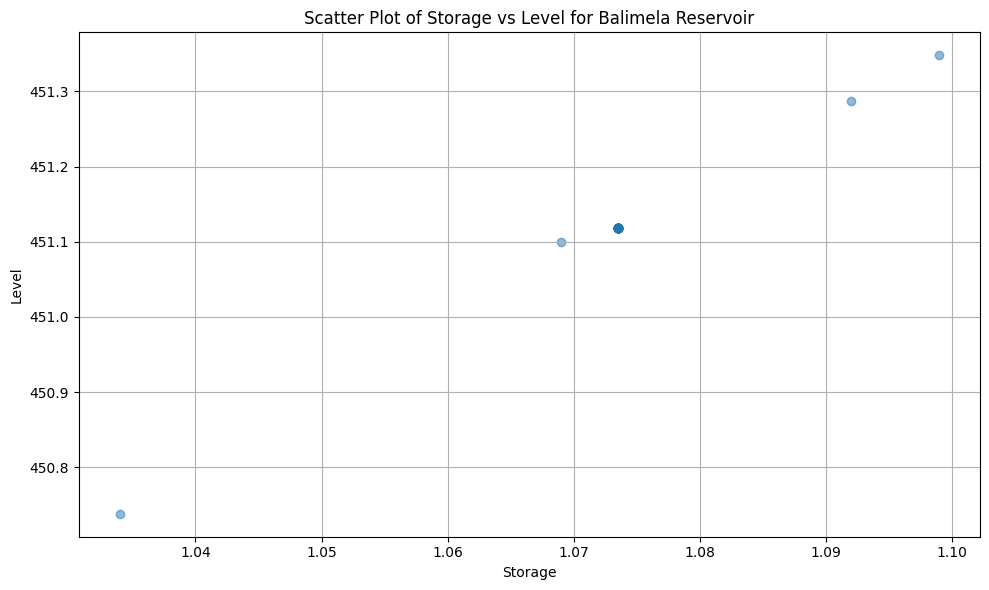

In [51]:
# Task 4 - Scatter Plot of Storage vs Level for Aliyar Reservoir, Almatti Reservoir and Balimela Reservoir

plt.figure(figsize=(10, 6))
plt.scatter(aliyar_data['Storage'], aliyar_data['Level'], alpha=0.5)
# Add labels and title
plt.xlabel("Storage")
plt.ylabel("Level")
plt.title("Scatter Plot of Storage vs Level for Aliyar Reservoir")
# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()


# Scatter plot for Almatti Reservoir
plt.figure(figsize=(10, 6))
plt.scatter(almatti_data['Storage'], almatti_data['Level'], alpha=0.5)
# Add labels and title
plt.xlabel("Storage")
plt.ylabel("Level")
plt.title("Scatter Plot of Storage vs Level for Almatti Reservoir")
# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot for Balimela Reservoir
plt.figure(figsize=(10, 6))
plt.scatter(balimela_data['Storage'], balimela_data['Level'], alpha=0.5)
# Add labels and title
plt.xlabel("Storage")
plt.ylabel("Level")
plt.title("Scatter Plot of Storage vs Level for Balimela Reservoir")
# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

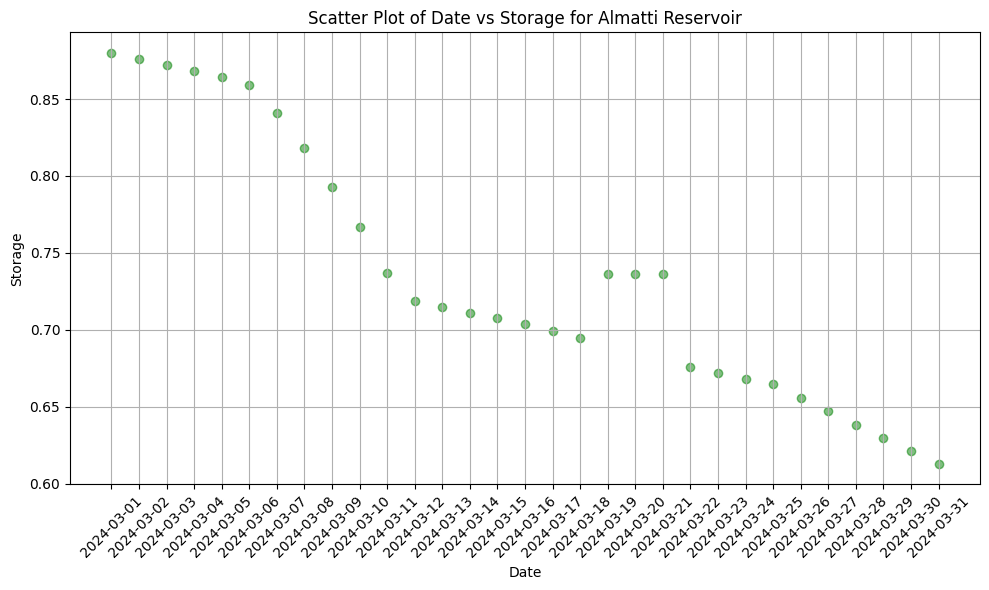

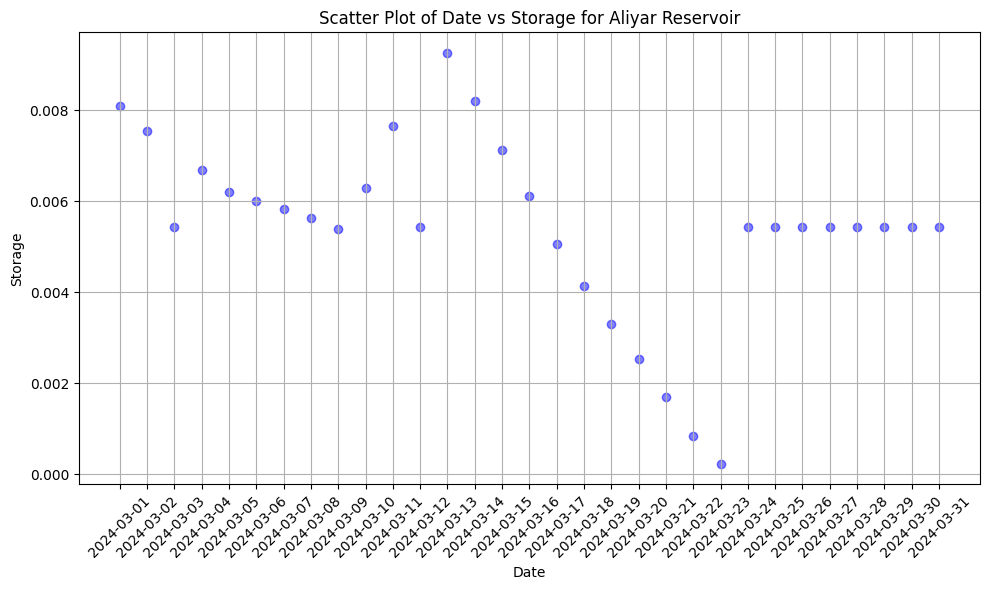

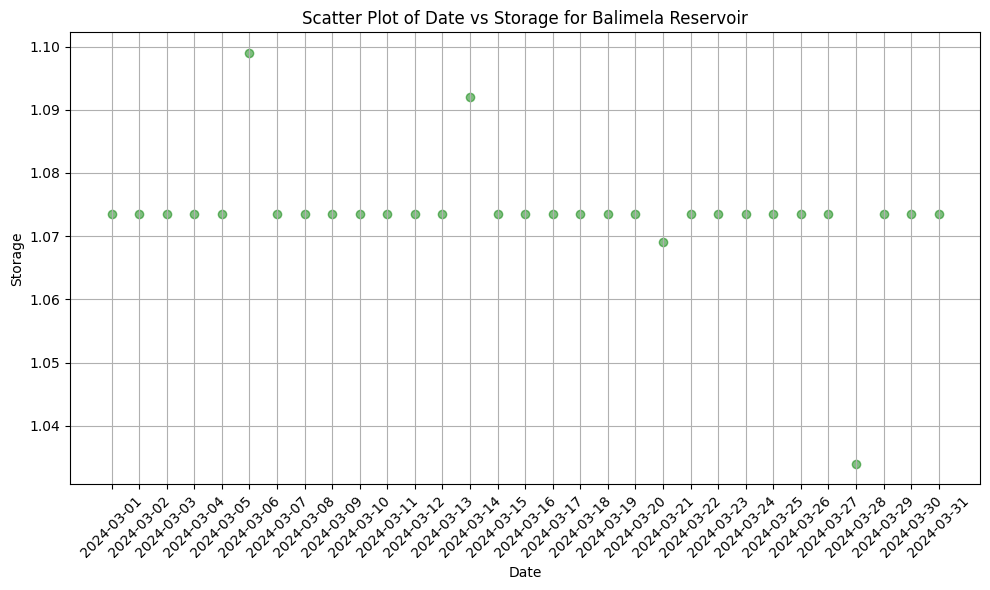

In [54]:
# Task 5 - Scatter Plot of Date vs Storage for Aliyar Reservoir, Almatti Reservoir, Balimela Reservoir
# Scatter plot for date and storage
plt.figure(figsize=(10, 6))
plt.scatter(almatti_data['Date'], almatti_data['Storage'], alpha=0.5, color='green')
# Add labels and title
plt.xlabel("Date")
plt.ylabel("Storage")
plt.title("Scatter Plot of Date vs Storage for Almatti Reservoir")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot for date and storage
plt.figure(figsize=(10, 6))
plt.scatter(aliyar_data['Date'], aliyar_data['Storage'], alpha=0.5, color='blue')
# Add labels and title
plt.xlabel("Date")
plt.ylabel("Storage")
plt.title("Scatter Plot of Date vs Storage for Aliyar Reservoir")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Scatter plot for date and storage
plt.figure(figsize=(10, 6))
plt.scatter(balimela_data['Date'], balimela_data['Storage'], alpha=0.5, color='green')
# Add labels and title
plt.xlabel("Date")
plt.ylabel("Storage")
plt.title("Scatter Plot of Date vs Storage for Balimela Reservoir")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


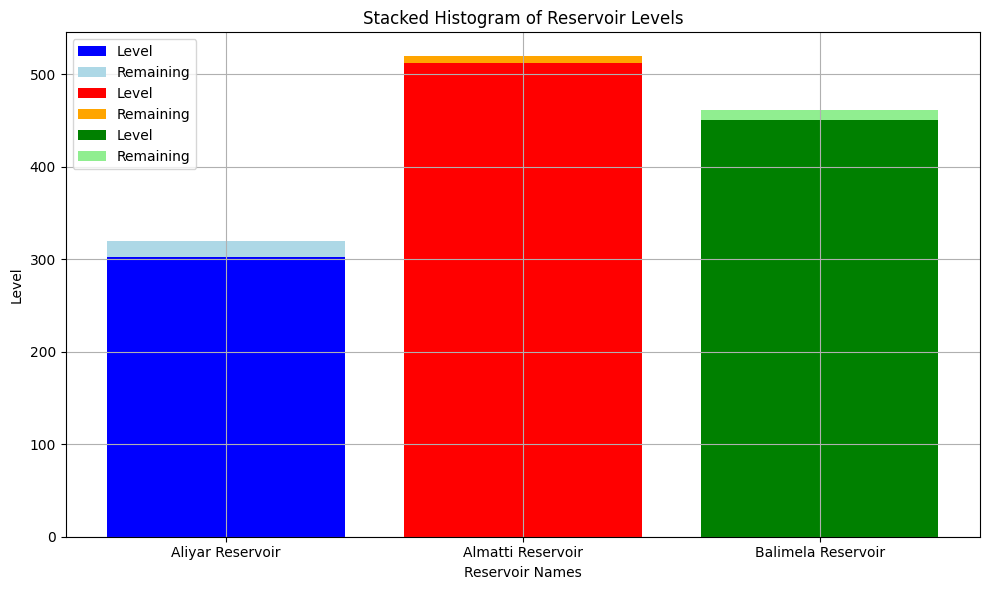

In [68]:
# Task 6- Stacked Histogram of Reservoir Levels

# Getting full reservoir levels
aliyar_full_level = aliyar_data['Full_reservoir_level'].iloc[0]
almatti_full_level = almatti_data['Full_reservoir_level'].iloc[0]
balimela_full_level = balimela_data['Full_reservoir_level'].iloc[0]

# Calculating remaining levels
aliyar_remaining_level = aliyar_full_level - aliyar_data['Level'].mean()
almatti_remaining_level = almatti_full_level - almatti_data['Level'].mean()
balimela_remaining_level = balimela_full_level - balimela_data['Level'].mean()

# Plotting histogram
plt.figure(figsize=(10, 6))

# Plotting histogram for Aliyar Reservoir
plt.bar('Aliyar Reservoir', aliyar_data['Level'].mean(), color='blue', label='Level')
plt.bar('Aliyar Reservoir', aliyar_remaining_level, bottom=aliyar_data['Level'].mean(), color='lightblue', label='Remaining')

# Plotting histogram for Almatti Reservoir
plt.bar('Almatti Reservoir', almatti_data['Level'].mean(), color='Red', label='Level')
plt.bar('Almatti Reservoir', almatti_remaining_level, bottom=almatti_data['Level'].mean(), color='orange', label='Remaining')

# Plotting histogram for Balimela Reservoir
plt.bar('Balimela Reservoir', balimela_data['Level'].mean(), color='green', label='Level')
plt.bar('Balimela Reservoir', balimela_remaining_level, bottom=balimela_data['Level'].mean(), color='lightgreen', label='Remaining')

# Adding labels and title
plt.xlabel('Reservoir Names')
plt.ylabel('Level')
plt.title('Stacked Histogram of Reservoir Levels')
plt.legend()

# Showing plot
plt.grid(True)
plt.tight_layout()
plt.show()


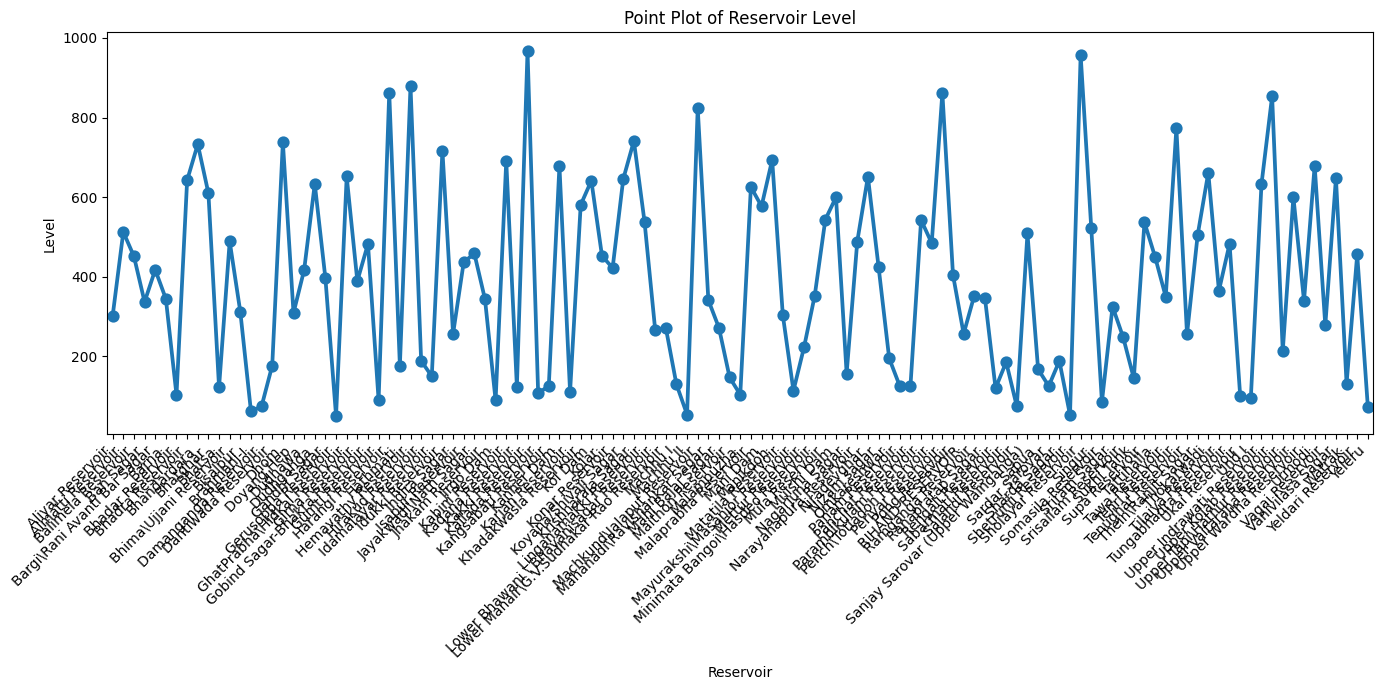

In [78]:

# Task new - Create point plot for all reservoirs
plt.figure(figsize=(14, 7))
sns.pointplot(data=df, x='Reservoir_name', y='Level')
plt.title('Point Plot of Reservoir Level')
plt.xlabel('Reservoir')
plt.ylabel('Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\karan\AppData\Local\Temp\ipykernel_24184\4201214164.py:5: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=dhom_data, x='Reservoir_name', y='Level',  join=False)


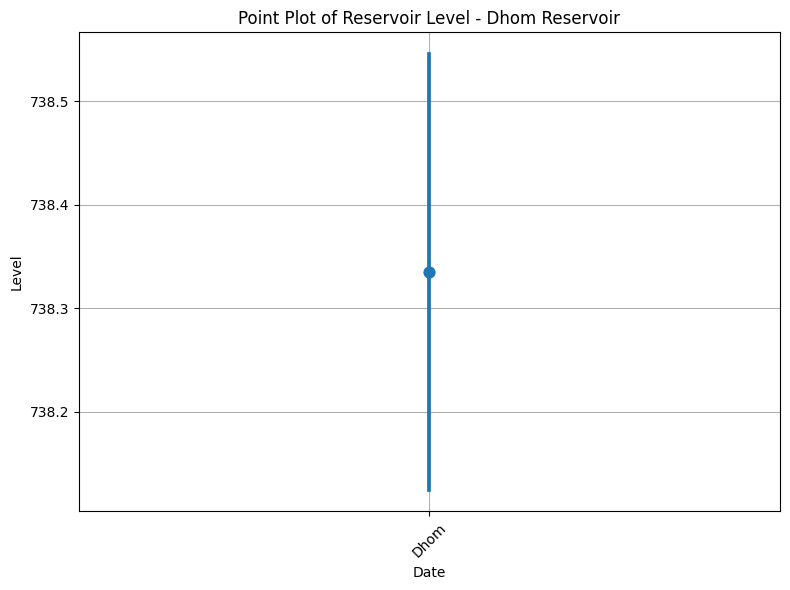

In [77]:
# separate data for Dhom reservoir
dhom_data = df[df['Reservoir_name'] == 'Dhom']

# Create point plot for Dhom reservoir
plt.figure(figsize=(8, 6))
sns.pointplot(data=dhom_data, x='Reservoir_name', y='Level',  join=False)
plt.title('Point Plot of Reservoir Level - Dhom Reservoir')
plt.xlabel('Date')
plt.ylabel('Level')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\karan\AppData\Local\Temp\ipykernel_24184\4226380384.py:9: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=combined_data, x='Reservoir_name', y='Level', join=False)


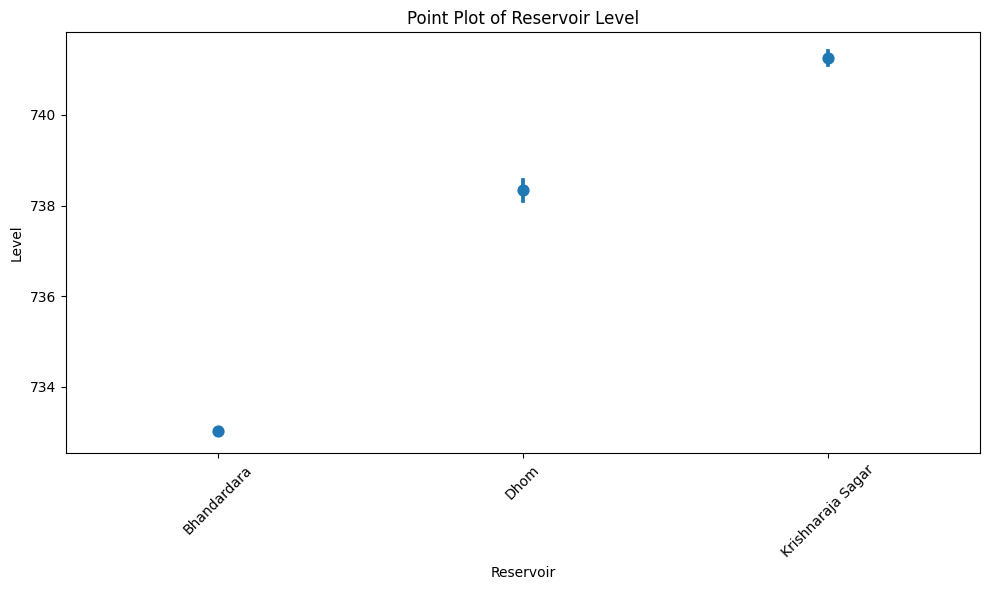

In [88]:
# Point plot for Bhandardara, Dhom, and Krishnaraja Sagar reservoirs
Bhandardara_data = df[df['Reservoir_name'] == 'Bhandardara']
Dhom_data = df[df['Reservoir_name'] == 'Dhom']
Krishnaraja_Sagar_data = df[df['Reservoir_name'] == 'Krishnaraja Sagar']

combined_data = pd.concat([Bhandardara_data, Dhom_data, Krishnaraja_Sagar_data])

# Create point plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=combined_data, x='Reservoir_name', y='Level', join=False)
plt.title('Point Plot of Reservoir Level')
plt.xlabel('Reservoir')
plt.ylabel('Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [55]:
# Task New-  Create boxplot for Combined_Data as well as Dhom Reservior
plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_data, x='Reservoir_name', y='Level')
plt.title('Boxplot of Reservoir Level - Combined Data')
plt.xlabel('Reservoir')
plt.ylabel('Level')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=dhom_data, x='Reservoir_name', y='Level')
plt.title('Boxplot of Reservoir Level - Dhom Reservoir')
plt.xlabel('Reservoir')
plt.ylabel('Level')
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'combined_data' is not defined

<Figure size 800x600 with 0 Axes>

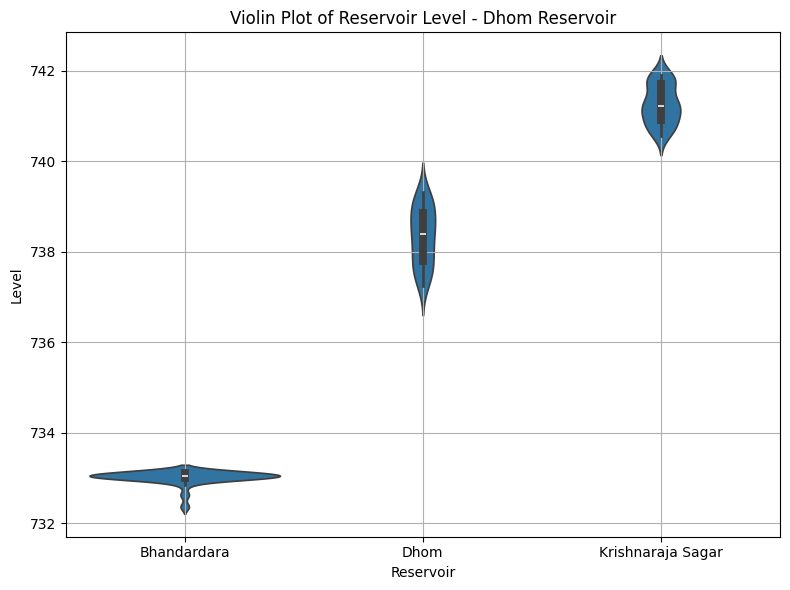

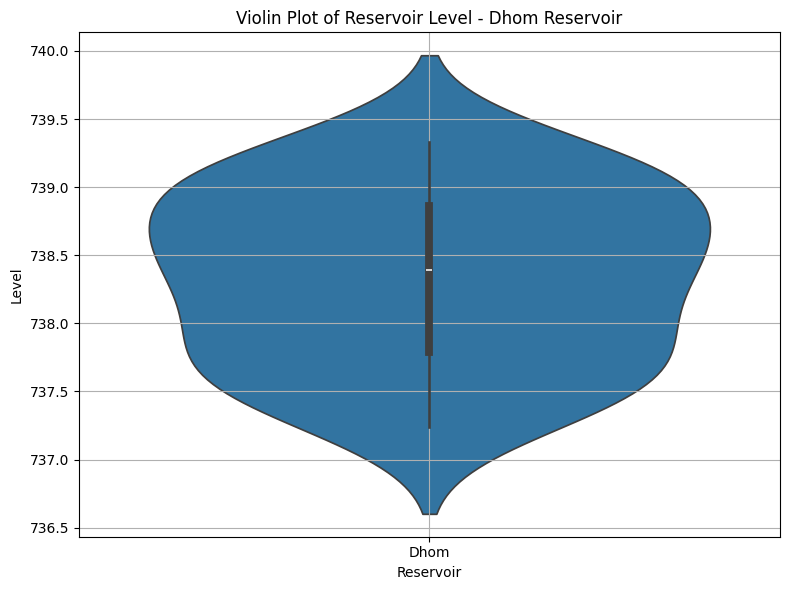

In [95]:
# Task New - Create violin plot for Combined_Data as well as Dhom Reservior
plt.figure(figsize=(8, 6))
sns.violinplot(data=combined_data, x='Reservoir_name', y='Level')
plt.title('Violin Plot of Reservoir Level - Dhom Reservoir')
plt.xlabel('Reservoir')
plt.ylabel('Level')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(data=dhom_data, x='Reservoir_name', y='Level')
plt.title('Violin Plot of Reservoir Level - Dhom Reservoir')
plt.xlabel('Reservoir')
plt.ylabel('Level')
plt.grid(True)
plt.tight_layout()
plt.show()

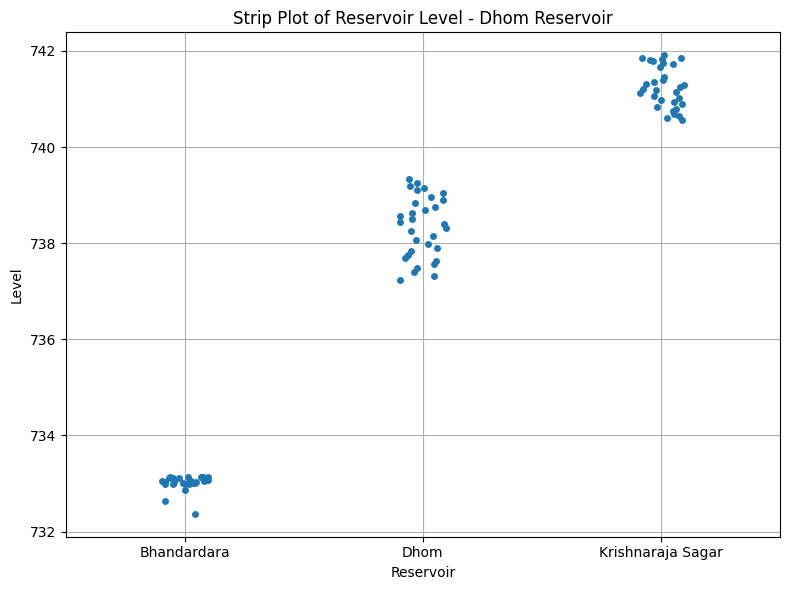

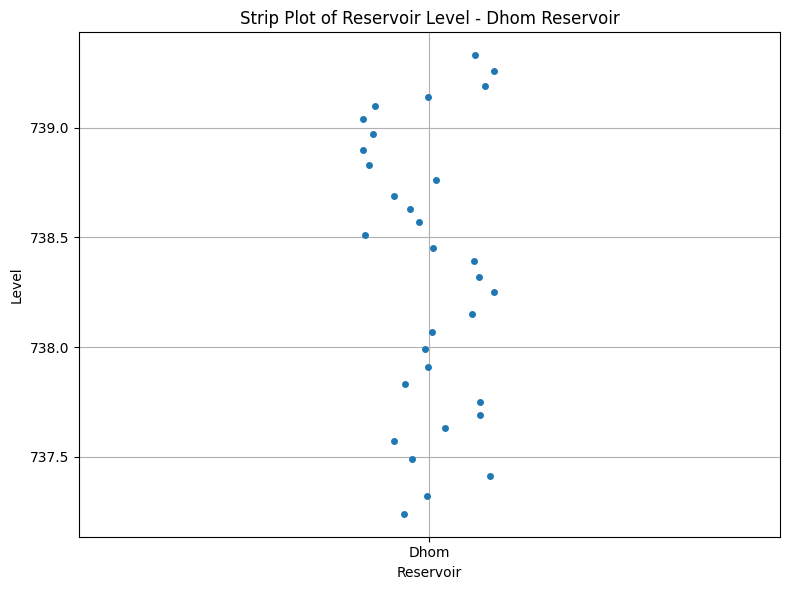

In [100]:
# Task New - Create strip plot for Combined_Data and Dhom reservoir
plt.figure(figsize=(8, 6))
sns.stripplot(data=combined_data, x='Reservoir_name', y='Level', jitter=True)
plt.title('Strip Plot of Reservoir Level - Dhom Reservoir')
plt.xlabel('Reservoir')
plt.ylabel('Level')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.stripplot(data=dhom_data, x='Reservoir_name', y='Level', jitter=True)
plt.title('Strip Plot of Reservoir Level - Dhom Reservoir')
plt.xlabel('Reservoir')
plt.ylabel('Level')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

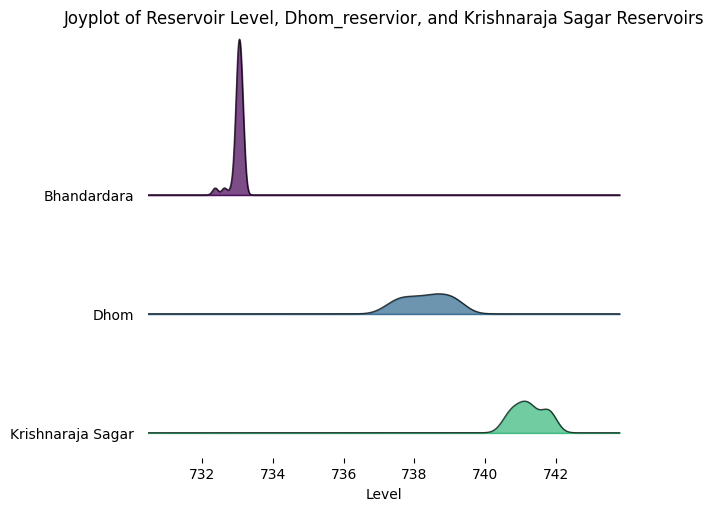

In [109]:
# Task new - Create Joyplot for Reservoir_name, Bhandardara, Dhom_reservior, and Krishnaraja Sagar Reservoirs

import joypy
import matplotlib.pyplot as plt
from matplotlib import cm

plt.figure(figsize=(10, 6))
joyplot = joypy.joyplot(data=combined_data, by='Reservoir_name', column='Level', linewidth=1, colormap=cm.viridis, alpha=0.7)
plt.title('Joyplot of Reservoir Level, Bhandardara, Dhom_reservior, and Krishnaraja Sagar Reservoirs')
plt.xlabel('Level')
plt.show()


In [33]:

# Select columns of interest
data = df[['Full_reservoir_level', 'Level']].dropna()  # Remove rows with missing values

# Check assumptions (normality and equal variance)
# You can use Shapiro-Wilk test for normality and Levene's test for equal variance

# Perform t-test
t_statistic, p_value = ttest_ind(data['Full_reservoir_level'], data['Level'])

# Interpret results
alpha = 0.05
print("T-test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the means.")


T-test Results:
T-statistic: 1.7505832657548672
P-value: 0.08005929160063702
Fail to reject the null hypothesis. There is no significant difference between the means.


In [53]:
from scipy import stats
import pandas as pd

# Define a list to store results for all reservoirs
results = []

# Iterate over each reservoir
for reservoir in df['Reservoir_name'].unique():
    # Filter data for the current reservoir
    reservoir_data = df[df['Reservoir_name'] == reservoir][['Storage', 'Level']].dropna()
    
    # Perform paired t-test
    t_statistic, p_value = stats.ttest_rel(reservoir_data['Storage'], reservoir_data['Level'])
    
    # Determine significance
    alpha = 0.05
    if p_value < alpha:
        significance_result = "Reject the null hypothesis. There is a statistically significant difference between Storage and Level for reservoir {}.".format(reservoir)
    else:
        significance_result = "Fail to reject the null hypothesis. There is no statistically significant difference between Storage and Level for reservoir {}.".format(reservoir)
    
    # Append results to the list
    results.append({'Reservoir': reservoir, 'Test_Statistic': t_statistic, 'P_Value': p_value, 'Significance': significance_result})

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


                       Reservoir  Test_Statistic        P_Value  \
0               Aliyar Reservoir    -1451.224759   2.913732e-74   
1              Almatti Reservoir    -7627.813784   6.991560e-96   
2             Balimela Reservoir   -32295.872243  1.101968e-114   
3                      Ban Sagar   -18202.902033  3.253571e-107   
4    Bargi\Rani Avanti Bai Sagar   -13632.245519  1.903517e-103   
..                           ...             ...            ...   
114              Vagai Reservoir    -3600.931437   4.208425e-86   
115             Vanivilasa Sagar   -14708.532093  1.947596e-104   
116                       Watrak    -3106.082115   3.549541e-84   
117            Yeldari Reservoir   -48158.230422  6.862212e-120   
118                       Yeleru    -1365.469415   1.811419e-73   

                                          Significance  
0    Reject the null hypothesis. There is a statist...  
1    Reject the null hypothesis. There is a statist...  
2    Reject the null hyp